## Recursive Least Square 

In [2]:
import sys
sys.path.append('../lib')

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from numpy.linalg import inv
from numpy import dot,power
from plot_utils import *

### Generate Data 

In [3]:
def func(X):
    return np.sin(X*np.pi*1.3) + X*5 + np.random.normal(size=(nb_data,1), scale = 1e-1)

Text(0.5,1,'Data points')

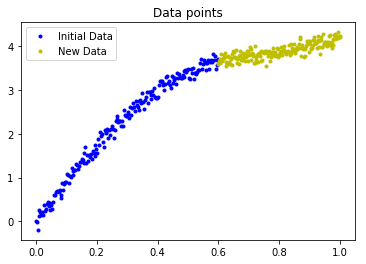

In [4]:
nb_data = 200  #Number of datapoints

#initial data
X = np.linspace(0,0.6,nb_data)[:,None]
Y = func(X)

#additional data
V = np.linspace(0.6,1.,nb_data)[:,None]
C = func(V)

fig_limit = [0,1.1,0.,4.5]

plt.plot(X,Y,'.b', label='Initial Data')
plt.plot(V,C,'.y', label='New Data')
plt.legend()
plt.title('Data points')

### Calculate LS with the initial data 

Text(0.5,1,'LS estimate using the initial data')

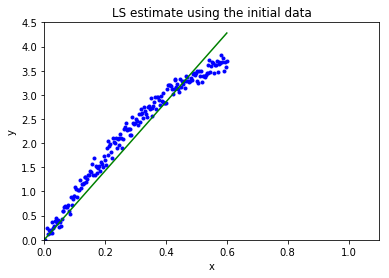

In [5]:
B_inv = inv(dot(X.T,X))
A = dot(B_inv,dot(X.T, Y)) 
Y_pred = dot(X,A)
plt.plot(X,Y,'.b')
plt.plot(X,Y_pred,'-g')
plt.xlabel('x')
plt.ylabel('y')
plt.axis(fig_limit)
plt.title('LS estimate using the initial data')

### Update LS with the new data 

In [6]:
X_complete = np.vstack([X,V])
Y_complete = np.vstack([Y,C])

Text(0.5,1,'Comparison of LS, RLS initial and RLS final')

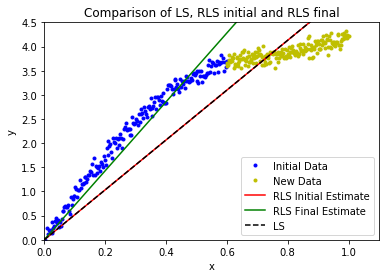

In [7]:
K = dot(B_inv, dot(V.T, inv(np.eye(nb_data) + dot(V,dot(B_inv, V.T)))))
A_new = A + dot(K,C-dot(V,A))
#Compute the prediction of Reweighted LS
Y_init = dot(X_complete, A)
Y_RLS = dot(X_complete, A_new)

#Compare against the standard LS using the complete data
A_LS = dot(inv(dot(X_complete.T,X_complete)),dot(X_complete.T, Y_complete)) 
Y_LS = dot(X_complete, A_LS)

#plot
plt.plot(X,Y,'.b', label='Initial Data')
plt.plot(V,C,'.y', label='New Data')
plt.plot(X_complete, Y_RLS, '-r', label='RLS Initial Estimate')
plt.plot(X_complete, Y_init, '-g', label='RLS Final Estimate')
plt.plot(X_complete, Y_LS,'--k',label='LS')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axis(fig_limit)
plt.title('Comparison of LS, RLS initial and RLS final')